<a href="https://colab.research.google.com/github/brhema2704/CODSOFT/blob/main/Task_3_Customer_Churn_Prediction/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER CHURN PREDICTION

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


Extracting Dataset

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip
uploaded = files.upload()

# Extract the uploaded ZIP
zip_path = "archive (4).zip"
extract_dir = "customer_churn_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


Saving archive (4).zip to archive (4).zip


Load Dataset

In [ ]:
data = pd.read_csv("/content/customer_churn_data/Churn_Modelling.csv")


Drop irrelevant columns

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


Encode categorical variables (Geography, Gender)

In [ ]:
le_geo = LabelEncoder()
le_gender = LabelEncoder()
data['Geography'] = le_geo.fit_transform(data['Geography'])
data['Gender'] = le_gender.fit_transform(data['Gender'])


Defining features and target

In [ ]:
X = data.drop('Exited', axis=1)
y = data['Exited']


Spliting the dataset into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Function to train and evaluate a model

In [ ]:
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔍 Results for {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔍 Results for Logistic Regression
Accuracy: 0.8075
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.16      0.25       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.78      0.81      0.76      2000



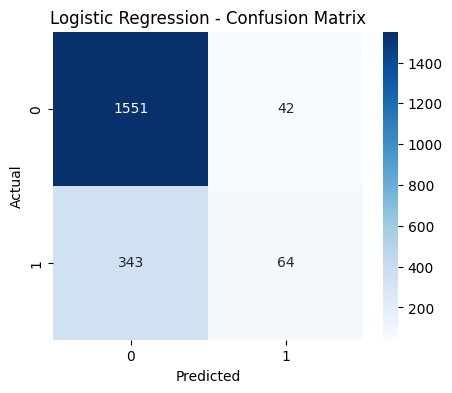

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
train_and_evaluate(lr_model, "Logistic Regression")


Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, "Random Forest")


NameError: name 'RandomForestClassifier' is not defined

Gradient Boosting


🔍 Results for Gradient Boosting
Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



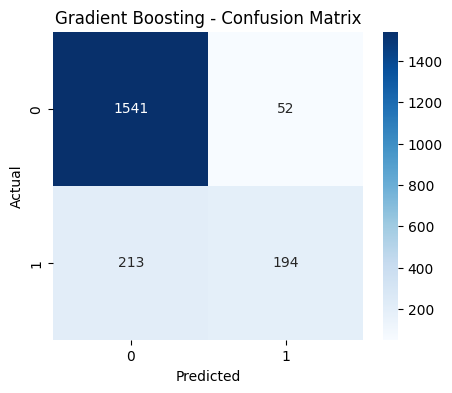

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate(gb_model, "Gradient Boosting")
